## Data Science Capstone Project

#### Outline of Discussion
1. The Data Science Methodology (Revision)
2. Vehicle's CO2 Emission Analysis - _A Case Study_
   * Problem Statement
   * Research Objectives
   * Actual Analysis
3. Further Actions 
4. Conclusion and Recommendation
5. Q & A

## 1. The Data Science Methodology (Revision)
CRIPS-DM Cross Industrial Standard Process for Data Mining

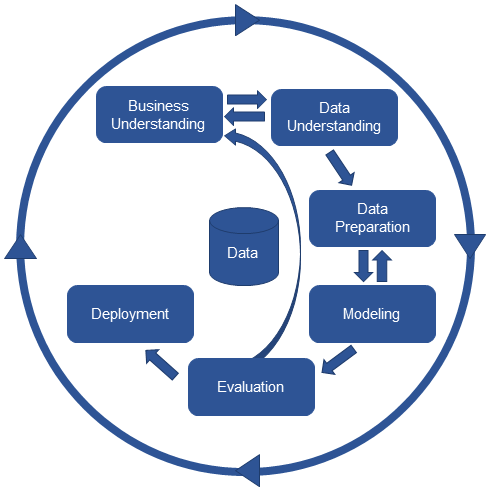

## 2. Vehicle's CO2 Emission Analysis - _A Case Study_

* Problem Statement
* Research Objectives
* Actual Analysis

### A. Business Understanding
This is the stage where the Data Scientist seeks to understand the problems of his client. For him to be effective in this, he must understand the problem(s) from the business perspective. This stage is equally characterised by much questions and hypothesis formulations. The DS attempts to equally translate the business problem into a Data Science problem. 

Let us take a look at the case we have below;
#### Problem Statement
An automobile company known as Company XX Ltd, started encountering minimum sales in their cars because of the complains made by their customers and buyers. Of which when analyzed critically proves that majority of those complains were tied down to the CO2 emitted by their vehicles overtime. This started affecting customers' choice of purchasing a particular brand of car as they are skeptical to choose cars with high CO2 emission. This recent attitude shouldn't be surprising as the world is attempting to move towards zero CO2 emission.  

The company in an attempt to maintain their customers started seeking for answers and solutions to these problems of which when solved will help them optimize their sales. Thus, a Data Science team was consulted and charged with the responsibility of building a digitalized system for determing CO2 being emitted by their cars overtime and detecting factors that are responsibile or would affect this rate of emission.
#### Research Objectives
- Determine factors affecting CO2 emitted 
- Building a deployable Machine learning model for the prediction of CO2 emitted by vehicles
- Explain model performance 
- Develop actionable insights from data
- Suggest new policies and conditions for the developed digital solutions

### B. Data Understanding
Here, the DS states the required data, understands the data and updates it if not satisfactory. Once the Required data is obtained, then data exploration is carried out immediately.

#### Data Requirements
This is usually dependent on the type or nature of the solutions to be built. experience and studies play important role here.

To begin, lets take a look at the dataset as we have requested from our company.


**Import the Data**

In [1]:
# import the necesaary library for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we read the data into our pandas dataframe
co2_df = pd.read_csv('CO2 Emissions_Data.csv')

In [3]:
co2_df.head(n=8) # we output the first 5 rows of the data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255


In [4]:
co2_data_description = pd.read_csv('Data Description.csv')

In [5]:
print(co2_data_description)

   Understanding the Data                                         Unnamed: 1
0                   Model                         4WD/4X4 = Four-wheel drive
1                     NaN                              AWD = All-wheel drive
2                     NaN                        FFV = Flexible-fuel vehicle
3                     NaN                              SWB = Short wheelbase
4                     NaN                               LWB = Long wheelbase
5                     NaN                           EWB = Extended wheelbase
6            Transmission                                      A = automatic
7                     NaN                              AM = automated manual
8                     NaN                   AS = automatic with select shift
9                     NaN                         AV = continuously variable
10                    NaN                                         M = manual
11                    NaN                           3 - 10 = Number of gears

### About Data
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Company XX Ltd. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features as listed out here. The same can be found in the Data Description sheet.

### Model
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

### Transmission
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

### Fuel type
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas

### Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

### CO2 Emissions
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**Check for Data Quality and Handle accordingly**

In [6]:
co2_df.shape # this outputs the shape of the data

(7385, 12)

In [7]:
co2_df.isnull().sum() # we check for the sum of missing values across all columns

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
co2_df.describe() # we use the describe() function to get the summary statistics

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
co2_df.info() # we use this to gain more information from the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

#### Data Visualizations
Next, will be to visualize the data so as to uncover such useful insights from the data. 

**Note:** For the sake of our study today, we will be limiting our methods to only descriptive statistics !

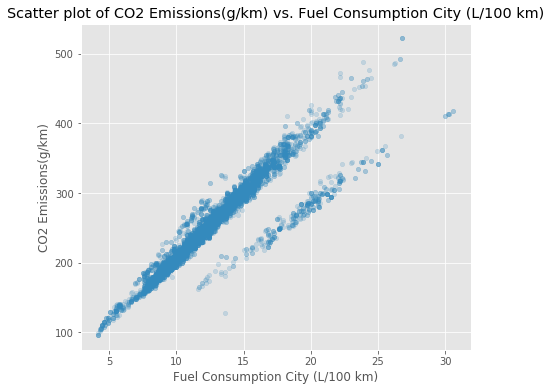

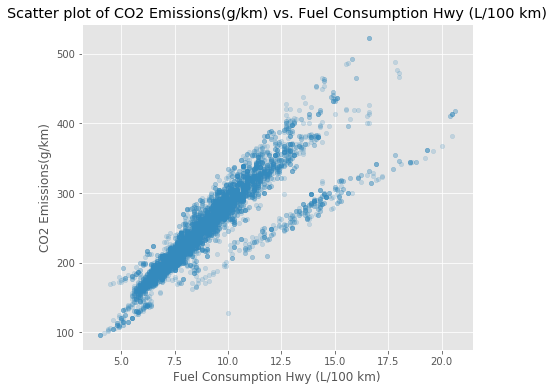

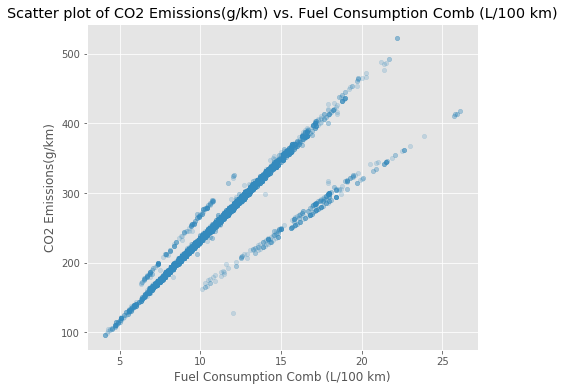

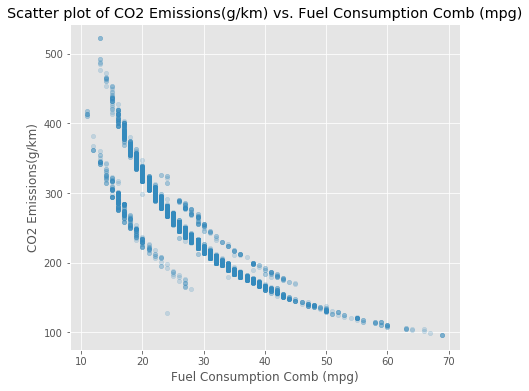

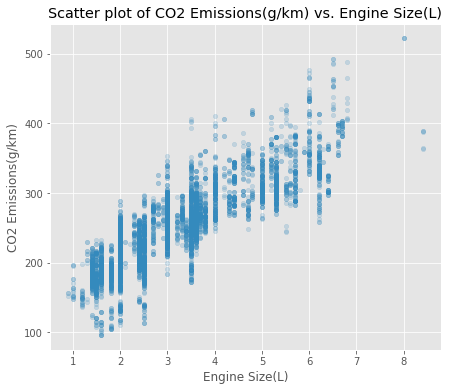

In [10]:
def plot_scatter_t(co2_df, cols, col_y = 'CO2 Emissions(g/km)', alpha = 1.0):
    
    for col in cols:
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        co2_df.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
        
num_cols = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
            'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 
           'Engine Size(L)']

plot_scatter_t(co2_df, num_cols, alpha = 0.2)        

**Categorical Data Visualizations**

In [11]:
def count_unique(co2_df, cols):
    
    for col in cols:
        print('\n' + 'For column ' + col)
        print(co2_df[col].value_counts())

cat_cols = ['Make', 'Model', 'Vehicle Class']

count_unique(co2_df, cat_cols)


For column Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

For column Model
F-150 FFV 4X4                        32
F-150 FFV         

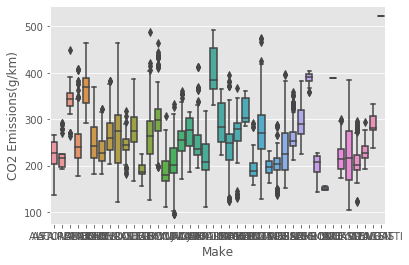

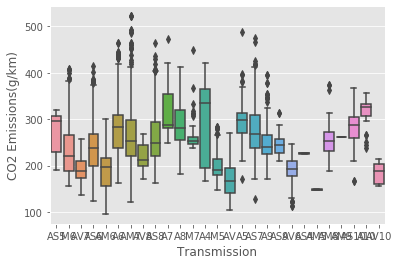

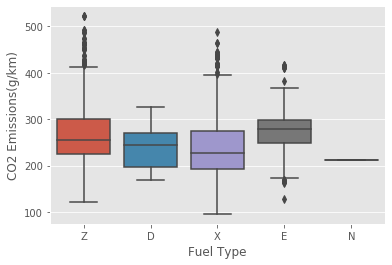

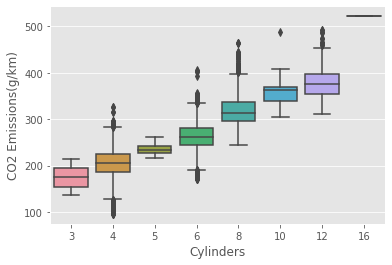

In [12]:
def plot_box(co2_df, cols, col_y = 'CO2 Emissions(g/km)'):
    
    for col in cols:
        plt.style.use('ggplot')
        sns.boxplot(col, col_y, data=co2_df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['Make', 'Transmission', 'Fuel Type', 'Cylinders'] 

plot_box(co2_df, cat_cols)    

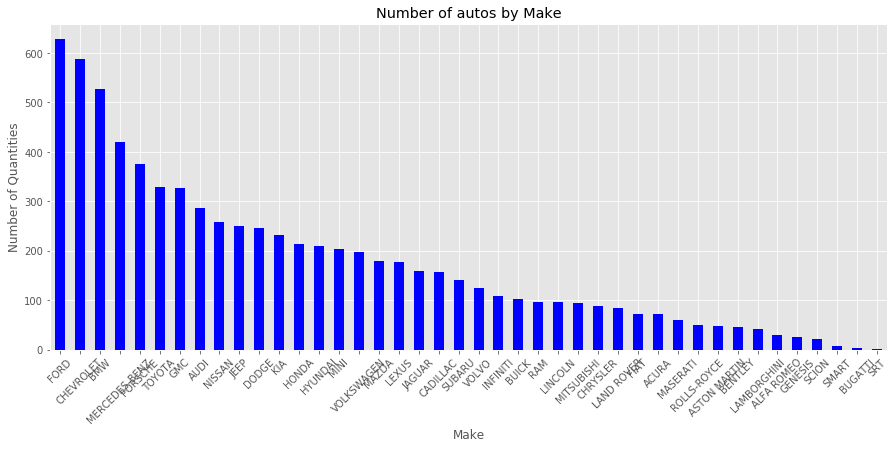

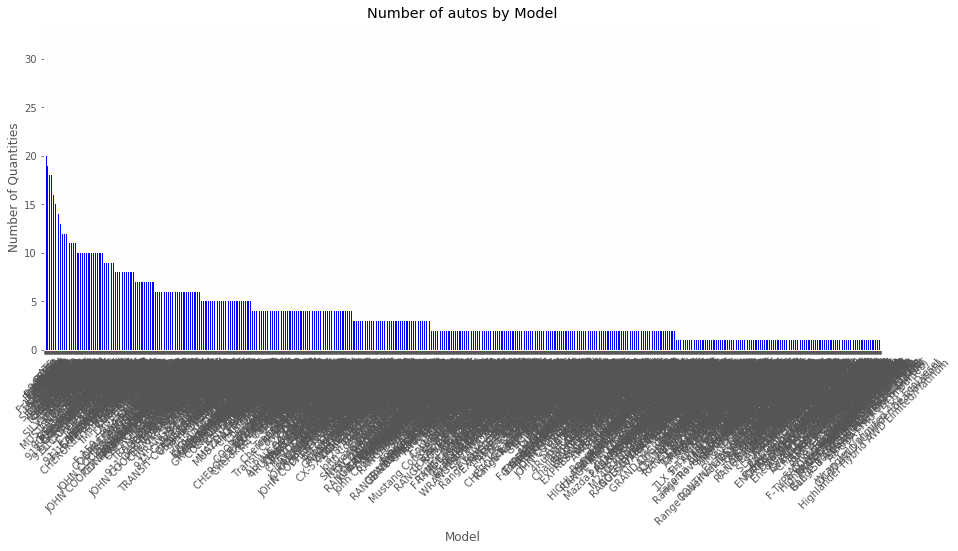

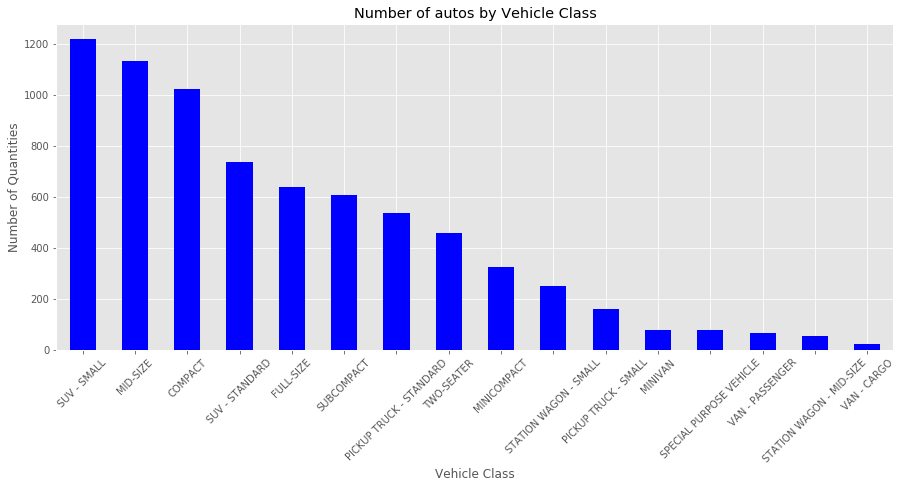

In [13]:
def plot_bars(co2_df, cols):
    
    for col in cols:
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(15,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = co2_df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Quantities')# Set text for y axis
        ax.tick_params(axis='x', labelrotation=45)
        plt.show()

plot_cols = ['Make', 'Model', 'Vehicle Class']
plot_bars(co2_df, plot_cols)    

Further reading
* https://www.gooddata.com/blog/5-data-visualization-best-practices/
* https://towardsdatascience.com/six-guidelines-for-good-visualizations-7c1831cda29f

In [14]:
corr_mx = co2_df.corr()
corr_mx

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


## Data Visualization guide 

**Data types**
1. Numerical (e.g Ages, salary etc.)
2. Categorical (e.g Gender, Country, School etc.)

Plotting Numerical vs Categorical
1. Bar plots, Histogram, boxplot, violin etc.

Plotting Numerical against Numerical
1. Scatter, heatmap etc.

Pearson correlation formular and maths https://www.wallstreetmojo.com/pearson-correlation-coefficient/

#### Rscore relationship for X and Y
- r > 0 +ve corr
- r < 0 -ve corr
- r = 0 no corr
- r = 1 perfect corr
Note: The closer the rscore is to +1, the stronger the +ve corr and same with -1

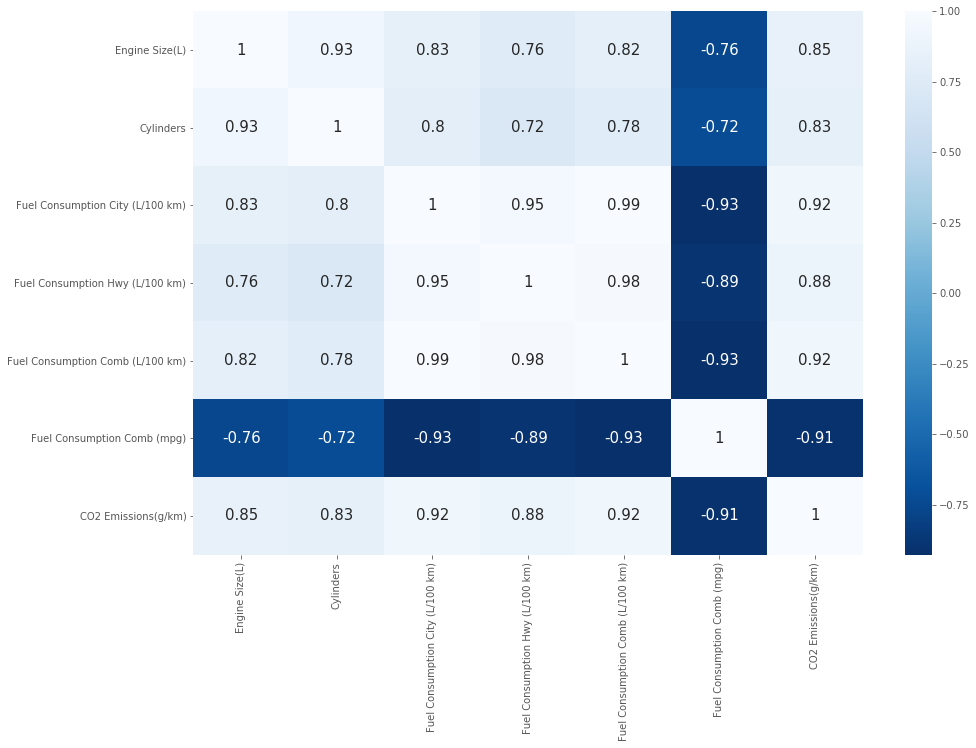

In [15]:
# make a correlation plot (heatmap)
corr_mx = co2_df.corr()
f, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':15}, cmap='Blues_r')

#### What can you see from the plots ?

### C. Data Preparation
This stage involves both cleaning and handling of the detected data quality issues during the data exploratary stage
#### Feature Selection and Data Cleaning

In [16]:
# we create new dataframe known as selected_df
selected_df = pd.DataFrame(co2_df, columns=['Engine Size(L)', 'Cylinders','Fuel Consumption City (L/100 km)', 
                                   'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                                   'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'])

In [17]:
selected_df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [18]:
selected_df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**Handling Outliers**

What are outliers and how do we handle them, lets discuss !

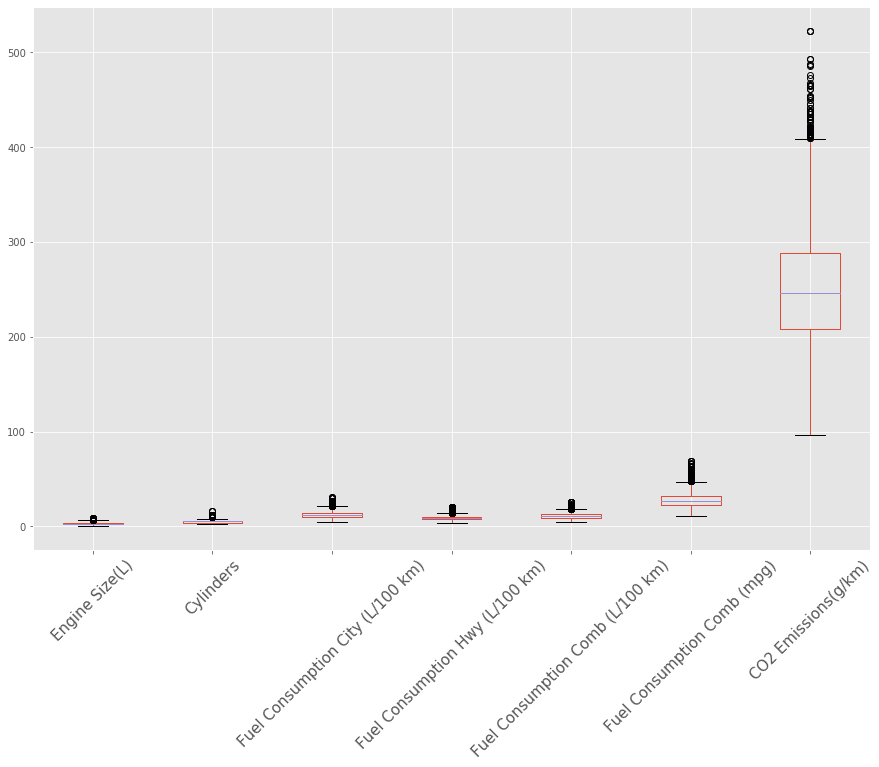

<Figure size 2160x1080 with 0 Axes>

In [21]:
# make a box plot of all the columns
plt.style.use('ggplot')
ax = selected_df.iloc[:, :].plot.box(figsize=(15, 10))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

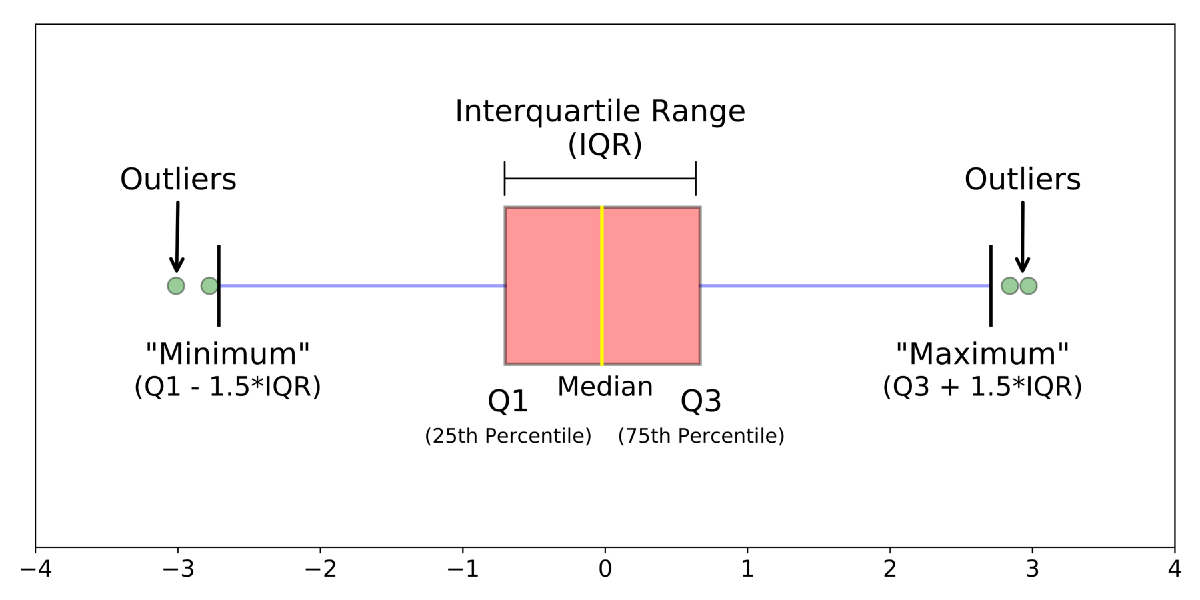

In [22]:
# we obtain our interquartile ranges (IQR)
Q1 = selected_df.quantile(0.25)
Q3 = selected_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine Size(L)                       1.7
Cylinders                            2.0
Fuel Consumption City (L/100 km)     4.5
Fuel Consumption Hwy (L/100 km)      2.7
Fuel Consumption Comb (L/100 km)     3.7
Fuel Consumption Comb (mpg)         10.0
CO2 Emissions(g/km)                 80.0
dtype: float64


In [26]:
[i for i in range(1, 11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
df_IQR = selected_df.copy() # get a copy of the original data df

df_out = df_IQR[~((df_IQR < (Q1 - 1.5 * IQR)) |(df_IQR > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_IQR.shape)
print(' ')
print(df_IQR.skew())
print(' ')
print(df_out.shape)
print(' ')
print(df_out.skew())

(7385, 7)
 
Engine Size(L)                      0.809181
Cylinders                           1.110415
Fuel Consumption City (L/100 km)    0.809005
Fuel Consumption Hwy (L/100 km)     1.079217
Fuel Consumption Comb (L/100 km)    0.893316
Fuel Consumption Comb (mpg)         0.977034
CO2 Emissions(g/km)                 0.526094
dtype: float64
 
(6826, 7)
 
Engine Size(L)                      0.792690
Cylinders                           0.508783
Fuel Consumption City (L/100 km)    0.486029
Fuel Consumption Hwy (L/100 km)     0.599222
Fuel Consumption Comb (L/100 km)    0.517592
Fuel Consumption Comb (mpg)         0.434727
CO2 Emissions(g/km)                 0.360694
dtype: float64


**Visualize again after handling the outliers**

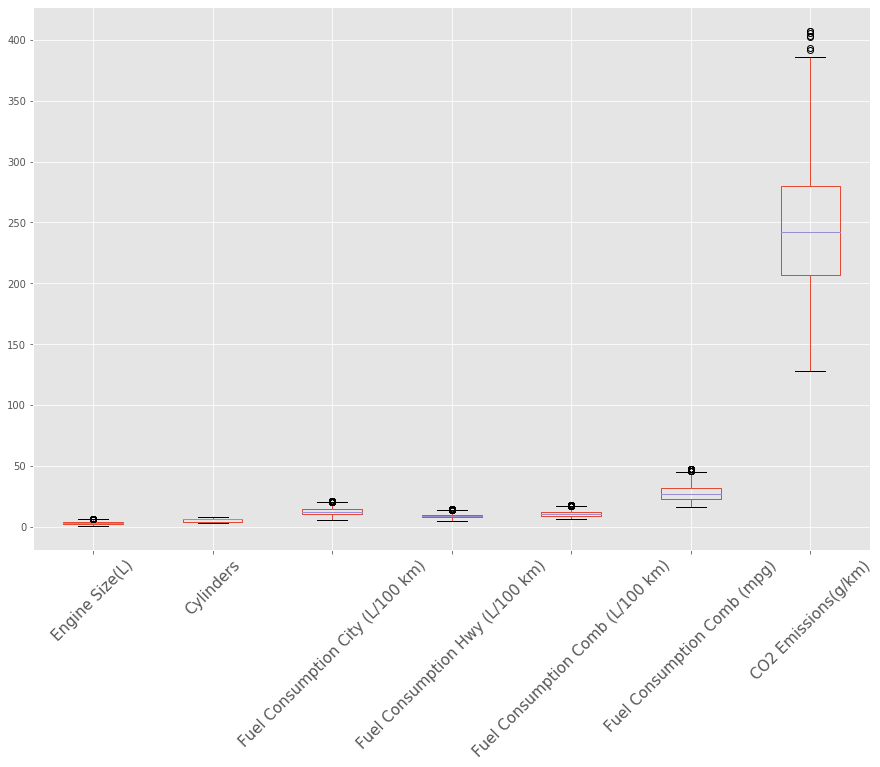

<Figure size 2160x1080 with 0 Axes>

In [30]:
# we make plot after handling the outliers
plt.style.use('ggplot')
ax = df_out.iloc[:, :].plot.box(figsize=(15, 10))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

#### Data preprocessing
This being part of the data preparation stage also helps us to transform the data into algorithm absorbable form

In [31]:
# we standardize the data

from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler() # import the class
df_s = s_scaler.fit_transform(df_out.iloc[:, :-1]) # we fit our data into it

df_s = pd.DataFrame(df_s, columns=df_out.iloc[:, :-1].columns) # we create a new dataframe to see our resuts
df_s.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.840291,-0.923374,-0.814051,-1.165035,-0.931810,0.878606
1,-0.508970,-0.923374,-0.349727,-0.610338,-0.457040,0.211045
2,0.402162,0.402028,0.186032,0.166239,0.190373,-0.456515
3,0.402162,0.402028,-0.028271,-0.055640,-0.025431,-0.122735
4,0.402162,0.402028,-0.099706,-0.610338,-0.284397,0.044155


Further reading: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

### Modeling
This is where we start building the model and using the expected evaluation matrices and skills 
#### Data Splitting

In [32]:
X = df_s.iloc[:, :-1] # input parameters
y = df_out.iloc[:, -1:] # output parameter

In [33]:
X # display our input parameters

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,-0.840291,-0.923374,-0.814051,-1.165035,-0.931810
1,-0.508970,-0.923374,-0.349727,-0.610338,-0.457040
2,0.402162,0.402028,0.186032,0.166239,0.190373
3,0.402162,0.402028,-0.028271,-0.055640,-0.025431
4,0.402162,0.402028,-0.099706,-0.610338,-0.284397
...,...,...,...,...,...
6821,-0.840291,-0.923374,-0.528313,-0.610338,-0.543362
6822,-0.840291,-0.923374,-0.349727,-0.277519,-0.327558
6823,-0.840291,-0.923374,-0.171140,-0.111110,-0.154914
6824,-0.840291,-0.923374,-0.349727,-0.277519,-0.327558


In [34]:
y # output our target label

,CO2 Emissions(g/km)
0,196
1,221
3,255
4,244
5,230
...,...
7380,219
7381,232
7382,240
7383,232


Python Machine Learning Library: scikitlearn https://scikit-learn.org/stable/

In [35]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model development and Evaluation

### Linear Regression Model

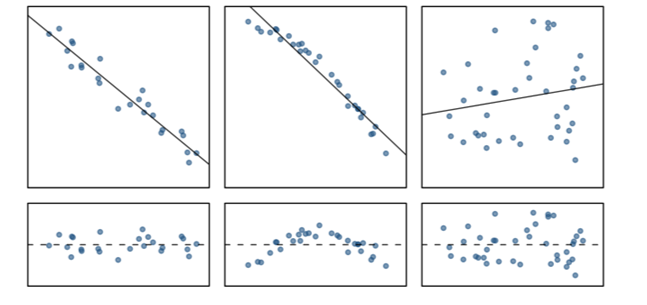

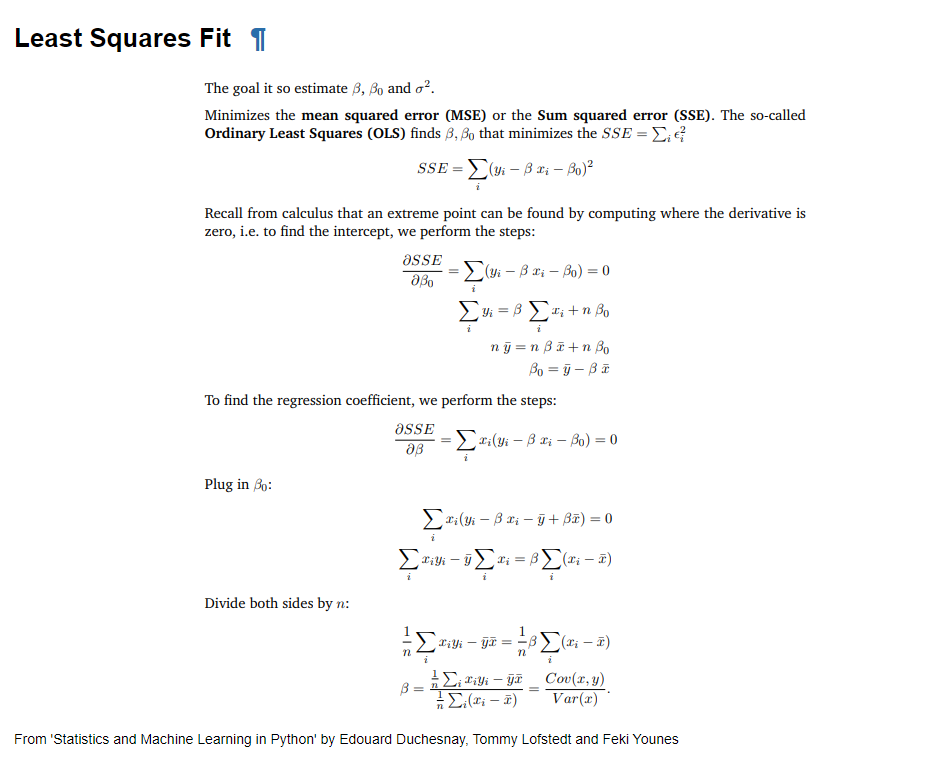

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [36]:
# we therefore import our required algorithm
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # create the instance of the class
lr_model.fit(X_train, y_train) # fit our data

y_pred_lr = lr_model.predict(X_test) # we make predictions on our test data

# we import some of our performance matrices
from sklearn import metrics 
from sklearn.metrics import r2_score

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_lr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_lr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(lr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(lr_model.score(X_test, y_test)))

MAE: 9.743972832322507
MSE: 258.5212839707947
RMSE: 16.078597077195344
R2_score: 0.8935759826727449
__________________________________________

Accuracy on train data: 0.8802066895746776
Accuracy on test data: 0.8935759826727449


In [37]:
lr_model.intercept_

array([245.6622252])

In [38]:
lr_model.coef_

array([[ 5.64775742,  8.64767074, -9.51216358,  6.34566712, 37.65054018]])

Straight line equation: $Y = mx + c$

Our Linear Model 
$Y(CO2) = 245.6622252 + 5.64775742X1 + 8.64767074X2 - 9.51216358X3 + 6.34566712X4 + 37.65054018X5$

Text(0.5, 1.0, 'Linear Regressor Test R2 = 0.893576')

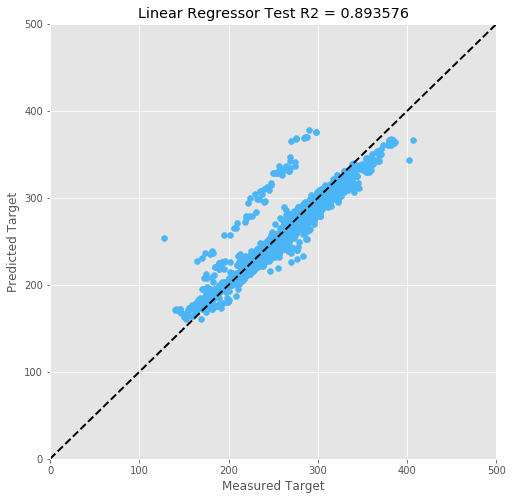

In [39]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 500, 00, 500])

plt.scatter(y_test, y_pred_lr, color='#4CB5F5')
plt.plot([0,500],[0,500],color='black',linewidth=2, linestyle='--')

plt.ylabel('Predicted Target') # Predicted values on y axis
plt.xlabel('Measured Target') 
plt.title('Linear Regressor Test R2 = %f'%(lr_model.score(X_test, y_test)))

### Random Forest Model

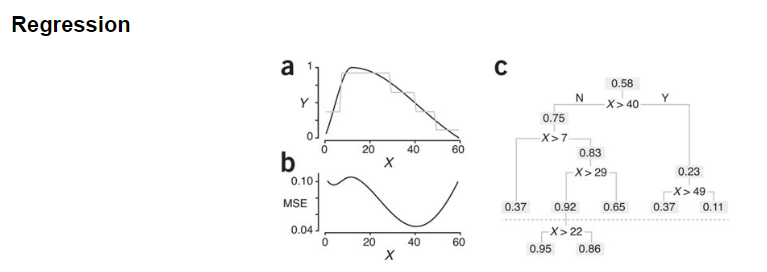

Consider the data provide in the picture a above:
* The average of Y is 0.58, so you start with that....
* Find a value of x = X1, such that the following quantity is the least. Check it out.....
$$[0.58 – mean(x < X1)]^2 + [0.58 – mean(x > X1)]^2$$ 

* It turns out that the value of X1 is chosen to be 40. So we make a split at x = 40. You will now have a left and a right branch for values of x<40 and x>40.


Consider the right branch now....
* For X > 40, the average value of Y is 0.23
* Find a value of x = X2, such that the following quantity is the least.
$$[0.23 – mean(x < X2)]^2 + [0.23 – mean(x > X2)]^2$$ 
* The optimal value of X2 is chosen to be 49. So we make a second split at x = 49. You will now have a left and a right branch for values of x<49 and x>49.

You can continue down for a desired number of splits or accuracy...



- Random Forest: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees 
- Decision Tree: https://scikit-learn.org/stable/modules/tree.html#regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

rfr_model = RandomForestRegressor() 

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_rfr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rfr_model.score(X_test, y_test)))

C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MAE: 2.6950352716609327
MSE: 49.44187789822216
RMSE: 7.031491868602434
R2_score: 0.9796465374559765
__________________________________________

Accuracy on train data: 0.9955908283662394
Accuracy on test data: 0.9796465374559765


Text(0.5, 1.0, 'Random Forest Regressor Test R2 = 0.979647')

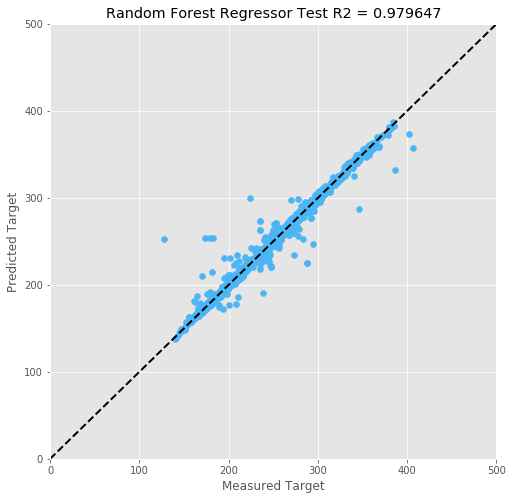

In [41]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 500, 00, 500])

plt.scatter(y_test, y_pred_rfr, color='#4CB5F5')
plt.plot([0,500],[0,500],color='black',linewidth=2, linestyle='--')

plt.ylabel('Predicted Target') # Predicted values on y axis
plt.xlabel('Measured Target') 
plt.title('Random Forest Regressor Test R2 = %f'%(rfr_model.score(X_test, y_test)))

In [42]:
rfr_model.feature_importances_ 

array([0.03511028, 0.0044726 , 0.02168828, 0.00957836, 0.92915048])

Text(0.5, 0, 'Feature importance')

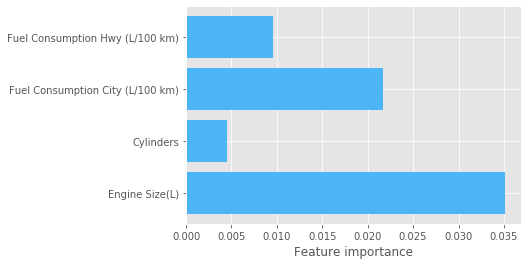

In [43]:
rfr_model.feature_importances_
plt.style.use('ggplot')
plt.barh(X.columns[:-1], rfr_model.feature_importances_[:-1], color='#4CB5F5')
plt.xlabel('Feature importance')

In [44]:
# save model
import joblib

filename = 'Randomforest_model.pkl'
joblib.dump(rfr_model, filename)

['Randomforest_model.pkl']

In [45]:
import sklearn
sklearn.__version__

'0.22.1'

### Deployment & Feedback

- GCP - Google
- AWS - Amazon
- Microsoft Azure - Microsoft

**Others**
- Streamlight
- Sagemaker
- Mia
- Gradio etc

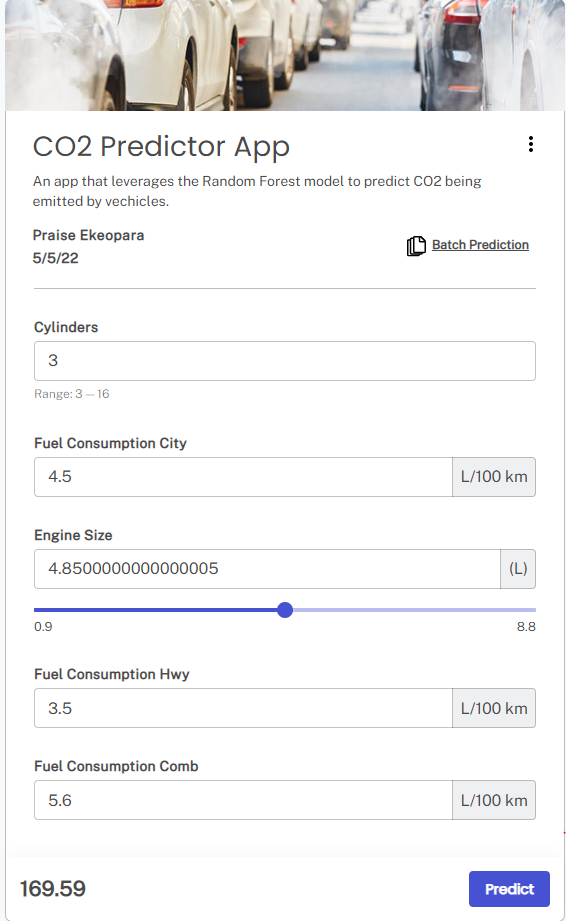

## Lets view the app by clicking [here](https://mia-ml.com/apps/2d5d62ed-0de9-4bdf-863d-af60f35702bc)

## Conclusion and & Recommendation

### Conclusion
- We have concluded our project as we have gained useful insights from our data
- We have been able to discover the factors affecting our models
- This model (the best model selected, Random Forest) can then be used to build the digital system as they company requested
- We have equally seen the role of various data analysis in solving a real life problem

### Recommendation
- For the sake of simplicity, we didn't consider categorical features such as the vechicle model types, make, transmission type, fuel type etc. They can be considered using suitable feature engineering techniques for building a more robust model.
- More data such as describing buyers and customers behaviour should be considered subsequently
- Based on the discovered insights, the marketing, R&D teams etc. should table up the responsibility of discoverying better ways and technologies for minimizing CO2 emissions. 